In [ ]:
# Author: Chongzheng Zhao
# Kaggle Competition - New York City Taxi Fare Prediction
# FINAL BEAT 1454 TEAMS!
# We team NYCTAXI located at 30 out of 1484 teams, Top 2%!
# Final Score 2.86770
# Competition Official Website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction
# To see the leaderboard(competition result): https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/leaderboard
# Welcome to my Github profile: https://github.com/ChongzhengZhao/
# Welcome to my Kaggle Profile: https://www.kaggle.com/chongzhengzhao
# Welcome to my Linkedin Profile: https://www.linkedin.com/in/chongzhengzhao/
# Last updated: 30/11/2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(55423856, 8)

In [4]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
train.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [11]:
#Fare amount is negative and it doesn't seem to be realistic
#few longitude and lattitude entries are off
#maximum passanger count is 208 which looks odd

In [12]:
train.dropna(how='any', axis=0, inplace = True)

In [13]:
train.shape #drop 376 

(55423480, 8)

In [14]:
train = train[train.fare_amount >=0]

In [15]:
train.shape # drop 2454

(55421026, 8)

In [16]:
train[train.passenger_count >7].shape

(101, 8)

In [17]:
train=train[train.passenger_count <=7]

In [18]:
train.shape #drop 101

(55420925, 8)

In [19]:
train[train.passenger_count ==0].shape

(195039, 8)

In [20]:
#Passanger count is incorrectly populated
#Taxi was not carrying any passanger, may be taxi was used for goods

In [21]:
train=train[train.passenger_count >0]

In [22]:
train.shape # drop 195k

(55225886, 8)

In [8]:
test = pd.read_csv("test.csv")

In [9]:
test.shape

(9914, 7)

In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [23]:
#store the minimum and maximum of the longitude and latitude from test data set and filter the train data set for those data points

In [24]:
min(test.pickup_longitude.min(),test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242000000005, -72.986531999999997)

In [25]:
min(test.pickup_latitude.min(),test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(),test.dropoff_latitude.max())

(40.568973, 41.709555000000002)

In [26]:
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [27]:
BB = (-74.5, -72.8, 40.5, 41.7)
train = train[select_within_test_boundary(train, BB)]
train.shape # drop 1,169,992

(54055894, 8)

In [28]:
train.head() 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [29]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1
55423855,2014-12-12 11:33:00.00000015,7.5,2014-12-12 11:33:00 UTC,-73.969722,40.797668,-73.970885,40.783313,1


In [30]:
test.head() 

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [31]:
test.tail() 

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23.0000006,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [ ]:
# eda sample 2,000,000 obs

In [33]:
train_sample = train.sample(n=2000000)

In [34]:
train_sample.shape

(2000000, 8)

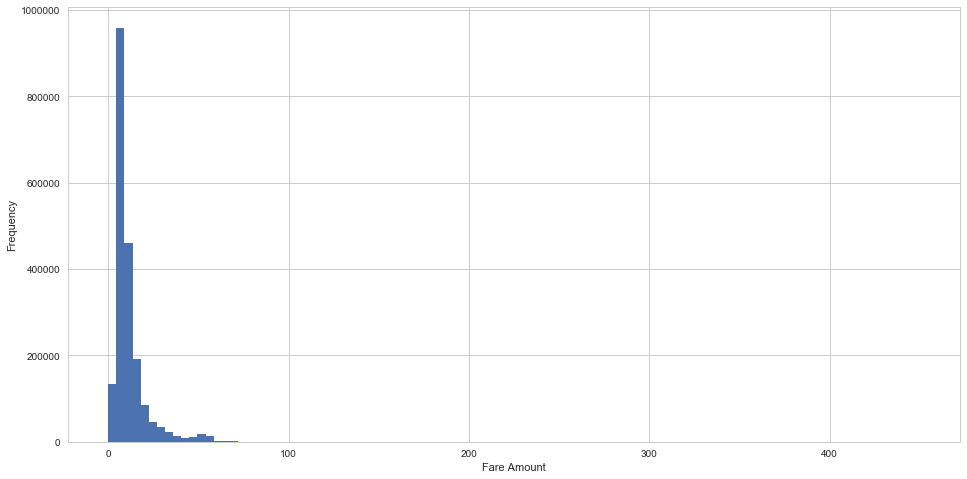

In [35]:
# Lets see the distribution of fare amount 
train_sample.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

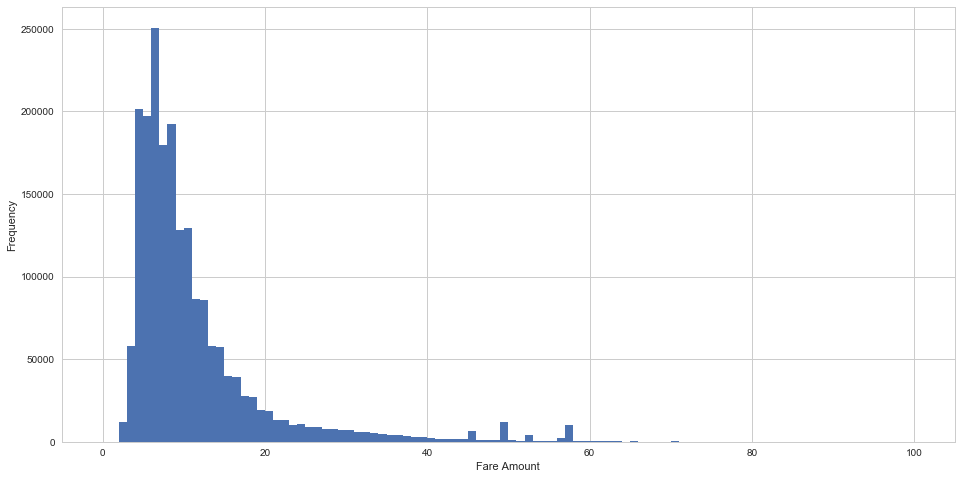

In [36]:
# Lets see the distribution of fare amount less than 100
train_sample[train_sample.fare_amount <=100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [37]:
#There are few points between 40 and 60 dollars which has slightly high frequency and that could be airport trips

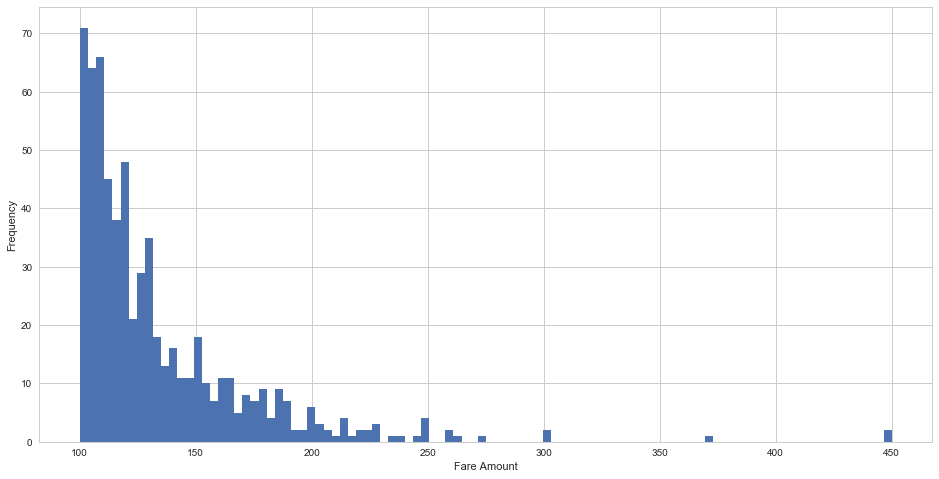

In [38]:
train_sample[train_sample.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [ ]:
#some of them might be outliers or few of them might be long distance trip from/to airport

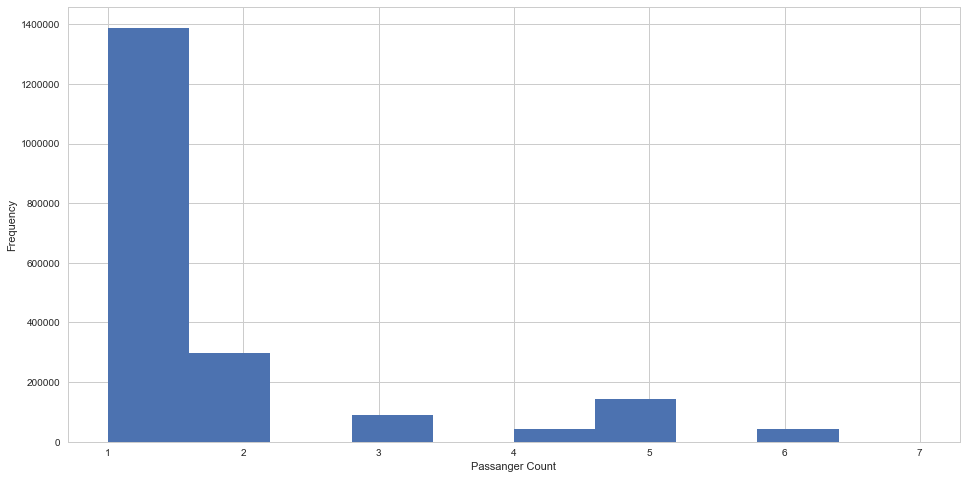

In [39]:
train_sample.passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

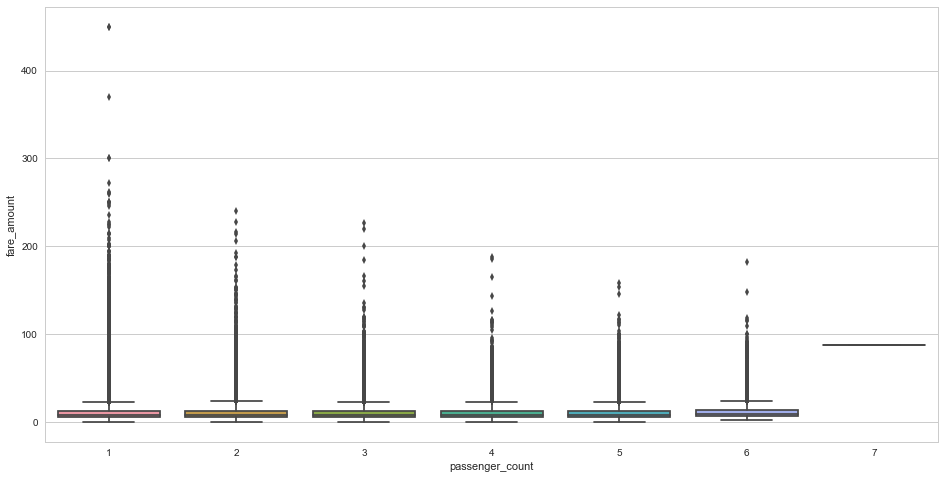

In [41]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train_sample.passenger_count, y = train.fare_amount)

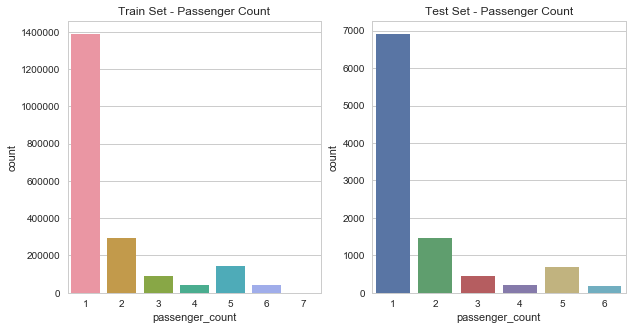

In [60]:
f, ax = plt.subplots(1,2,figsize = [10,5])
sns.countplot(train_sample["passenger_count"], ax=ax[0])
sns.countplot(test["passenger_count"], ax=ax[1])
ax[0].set_title("Train Set - Passenger Count")
ax[1].set_title("Test Set - Passenger Count")
plt.show()

In [42]:
# feature engineering
# time
# distance

In [43]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.replace(" UTC", "")
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['hour_of_day'] = df.pickup_datetime.dt.hour
    df['week'] = df.pickup_datetime.dt.week
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df['day_of_year'] = df.pickup_datetime.dt.dayofyear
    df['week_of_year'] = df.pickup_datetime.dt.weekofyear
    df["weekday"] = df.pickup_datetime.dt.weekday
    df["quarter"] = df.pickup_datetime.dt.quarter
    df["day_of_month"] = df.pickup_datetime.dt.day
    return df

In [44]:
train = prepare_time_features(train)
test = prepare_time_features(test)

In [ ]:
train.shape

In [45]:
test.shape # add 9 time features

(9914, 16)

In [46]:
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [47]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [48]:
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                      test.dropoff_latitude, test.dropoff_longitude)

In [49]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)].shape

(178, 18)

In [51]:
train = train.drop(train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
train.shape # drop 178 obs 

(54055716, 18)

In [52]:
# Calculating pickup and drop distance from all 3 airports of Air Ports
def transform(data):
    # Distances to nearby airports, 
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

In [53]:
train = transform(train)
test = transform(test)

In [54]:
train.shape # add 7 distance features totally

(54055716, 24)

In [55]:
train[train['fare_amount'] < 2.5].shape

(1651, 24)

In [56]:
#the base fare for any taxi in new york is 2.5 dollars, we will drop those cases

In [57]:
train = train.drop(train[train['fare_amount'] < 2.5].index, axis=0)

In [58]:
train.shape

(54054065, 24)

In [59]:
test.shape

(9914, 23)

In [61]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,week,...,weekday,quarter,day_of_month,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,25,...,0,2,15,0.640487,6.527098,5.926672,17.433727,17.508086,4.142790,4.776039
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,...,1,1,5,5.250670,13.373879,14.335733,8.435586,12.054959,8.708241,5.518847
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,33,...,3,3,18,0.863411,13.550258,13.478114,11.198778,10.482997,5.791580,6.399678
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,16,...,5,2,21,1.739386,12.657169,13.789559,10.266000,10.687245,6.648280,6.287901
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,10,...,1,1,9,1.242218,13.254398,13.577000,12.092157,13.133498,4.961705,4.350323


In [62]:
train.to_csv('train_model.csv', index=False)

In [63]:
test.to_csv('test_model.csv', index=False)

In [64]:
# model
# lightgbm
# xgboost
# random forest
# catboost

In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc

In [ ]:
# two big dataset: sample 5,000,000

In [4]:
train=pd.read_csv('train_model.csv')

In [5]:
#train= train.sample(n=5000000)

In [6]:
train.shape

(5000000, 24)

In [7]:
test=pd.read_csv('test_model.csv')

In [8]:
feats = [f for f in train.columns if f not in ['key','pickup_datetime','fare_amount']]

In [13]:
folds = KFold(n_splits=5, shuffle=True, random_state=1001)
# Create arrays and dataframes to store results
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])
feature_importance_df = pd.DataFrame()
    
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train[feats], train['fare_amount'])):
    dtrain = lgb.Dataset(data=train[feats].iloc[train_idx], 
                         label=train['fare_amount'].iloc[train_idx],
                         free_raw_data=False)
    dvalid = lgb.Dataset(data=train[feats].iloc[valid_idx],
                         label=train['fare_amount'].iloc[valid_idx],
                         free_raw_data=False)
    params = {'boosting_type': 'gbdt',
              'objective': 'regression',
              'metric':'rmse',
              'learning_rate': 0.03,
              'num_leaves': 30, 
              'max_depth': 7,  
              'min_child_samples': 70,  
              'max_bin': 300,  
              'subsample': 1.0,  
              'subsample_freq': 1,  
              'colsample_bytree': 0.9,  
              'min_split_gain': 0.5,
              'min_child_weight': 4,
              'reg_lambda':0.1,
              'reg_alpha': 0.1,
              'nthread': 8,
              'verbose': -1,}
    
    clf = lgb.train(params, 
                    dtrain, 
                    valid_sets=[dtrain, dvalid], 
                    valid_names=['train','valid'],
                    num_boost_round=10000,
                    early_stopping_rounds=125,
                    verbose_eval=500)

    oof_preds[valid_idx] = clf.predict(train[feats].iloc[valid_idx])
    sub_preds += clf.predict(test[feats]) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d rmse : %.6f' % (n_fold + 1,mean_squared_error(train['fare_amount'].iloc[valid_idx], oof_preds[valid_idx]) ** .5)) 
    del clf, dtrain, dvalid
    gc.collect()

print('Full rmse %.6f' % mean_squared_error(train['fare_amount'], oof_preds)**.5)
# Write submission file and plot feature importance
sub_df = test[['key']].copy()
sub_df['fare_amount'] = sub_preds
sub_df[['key', 'fare_amount']].to_csv('submission_lgb2.csv', index= False)

Training until validation scores don't improve for 125 rounds.
[500]	train's rmse: 3.67372	valid's rmse: 3.7396
[1000]	train's rmse: 3.57068	valid's rmse: 3.66357
[1500]	train's rmse: 3.5137	valid's rmse: 3.62972
[2000]	train's rmse: 3.4722	valid's rmse: 3.61049
[2500]	train's rmse: 3.43951	valid's rmse: 3.59745
[3000]	train's rmse: 3.41184	valid's rmse: 3.58789
[3500]	train's rmse: 3.38802	valid's rmse: 3.58103
[4000]	train's rmse: 3.36618	valid's rmse: 3.57597
[4500]	train's rmse: 3.34638	valid's rmse: 3.57188
[5000]	train's rmse: 3.32722	valid's rmse: 3.56797
[5500]	train's rmse: 3.3105	valid's rmse: 3.56538
[6000]	train's rmse: 3.29462	valid's rmse: 3.56322
[6500]	train's rmse: 3.27976	valid's rmse: 3.56179
Early stopping, best iteration is:
[6431]	train's rmse: 3.28178	valid's rmse: 3.56173
Fold  1 rmse : 3.561726
Training until validation scores don't improve for 125 rounds.
[500]	train's rmse: 3.66582	valid's rmse: 3.7858
[1000]	train's rmse: 3.56642	valid's rmse: 3.71439
[1500]

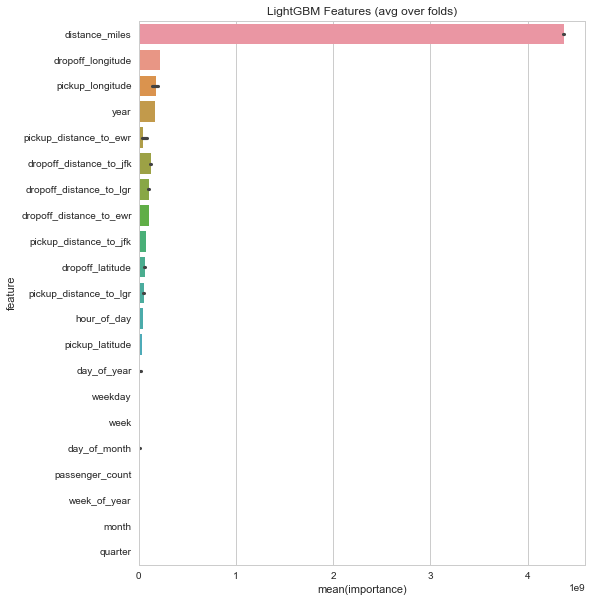

In [14]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout
plt.show()

In [15]:
# bayesian optimization

In [16]:
from bayes_opt import BayesianOptimization

In [17]:
feats = [f for f in train.columns if f not in ['key','pickup_datetime','fare_amount']]
X=train[feats]
y=train['fare_amount']

In [18]:
def bayes_parameter_opt_lgb(X, y, init_round=2, opt_round=8, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.03, output_process=True):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y,free_raw_data=False)
    # parameters
    def lgb_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_lambda, reg_alpha, min_split_gain, min_child_weight, 
                min_child_sample, max_bin, subsample_freq):
        params = {'objective':'regression','boosting_type': 'gbdt','nthread': 4, 'verbose': -1,\
                  'num_boost_round': n_estimators, 'learning_rate':learning_rate, \
                  'early_stopping_round':125}
        params['subsample_freq']=int(round(subsample_freq))
        params['min_child_sample']=int(round(min_child_sample))
        params['max_bin']=int(round(max_bin))
        params["num_leaves"] = int(round(num_leaves))
        params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
        params['subsample'] = max(min(subsample, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['reg_lambda'] = max(reg_lambda, 0)
        params['reg_alpha'] = max(reg_alpha, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval=500, metrics=['rmse'])
        return max(cv_result['rmse-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (20, 100),
                                            'colsample_bytree': (0.6, 1.0),
                                            'subsample': (0.6, 1.0),
                                            'max_depth': (-1, 8),
                                            'reg_lambda': (0, 1),
                                            'reg_alpha': (0, 1),
                                            'min_child_sample':(20,100),
                                            'max_bin':(180,500),
                                            'subsample_freq':(1,10),
                                            'min_split_gain': (0.1, 0.8),
                                            'min_child_weight': (3, 20)})
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    #return lgbBO.res['max']['max_params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=2, opt_round=8, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.03,output_process=True)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)


Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   max_bin |   max_depth |   min_child_sample |   min_child_weight |   min_split_gain |   num_leaves |   reg_alpha |   reg_lambda |   subsample |   subsample_freq | 
[500]	cv_agg's rmse: 3.7389 + 0.077189
[1000]	cv_agg's rmse: 3.6603 + 0.077709
[1500]	cv_agg's rmse: 3.62421 + 0.0780063
[2000]	cv_agg's rmse: 3.60173 + 0.0798864
[2500]	cv_agg's rmse: 3.58684 + 0.0790663
[3000]	cv_agg's rmse: 3.57732 + 0.0794719
[3500]	cv_agg's rmse: 3.57032 + 0.0797964
[4000]	cv_agg's rmse: 3.56562 + 0.0803206
[4500]	cv_agg's rmse: 3.56139 + 0.0803653
[5000]	cv_agg's rmse: 3.558 + 0.0807158
[5500]	cv_agg's rmse: 3.5551 + 0.0804389
[6000]	cv_agg's rmse: 3.55306 + 0.0803268
[6500]	cv_agg's rmse: 3.55124 + 0.0803134
[7000]	cv_agg's 

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Bayesian Optimization
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   max_bin |   max_depth |   min_child_sample |   min_child_weight |   min_split_gain |   num_leaves |   reg_alpha |   reg_lambda |   subsample |   subsample_freq | 
[500]	cv_agg's rmse: 3.70086 + 0.0766031
[1000]	cv_agg's rmse: 3.63561 + 0.0784866
[1500]	cv_agg's rmse: 3.60955 + 0.0781933
[2000]	cv_agg's rmse: 3.59603 + 0.0784326
[2500]	cv_agg's rmse: 3.58726 + 0.0777414
[3000]	cv_agg's rmse: 3.58339 + 0.0781642
[3500]	cv_agg's rmse: 3.58002 + 0.0783934
[4000]	cv_agg's rmse: 3.57766 + 0.0786655
[4500]	cv_agg's rmse: 3.57663 + 0.0781121
[5000]	cv_agg's rmse: 3.57576 + 0.0782674


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    3 | 114m14s |    9.47593 |             0.7682 |  282.6712 |      6.5581 |            71.7125 |            13.5135 |           0.3629 |      34.8234 |      0.5900 |       0.5564 |      0.6666 |           2.1730 | 
[500]	cv_agg's rmse: 3.64535 + 0.076292
[1000]	cv_agg's rmse: 3.59984 + 0.078433
[1500]	cv_agg's rmse: 3.5842 + 0.0784307
[2000]	cv_agg's rmse: 3.5773 + 0.0775631
[2500]	cv_agg's rmse: 3.57363 + 0.077713
[3000]	cv_agg's rmse: 3.57165 + 0.0775132


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    4 | 74m08s |    9.46552 |             0.9974 |  302.4669 |     -0.6260 |            20.0605 |            16.3854 |           0.2825 |      57.3723 |      0.2619 |       0.0346 |      0.6781 |           6.8627 | 
[500]	cv_agg's rmse: 3.61551 + 0.080196
[1000]	cv_agg's rmse: 3.58107 + 0.0798847
[1500]	cv_agg's rmse: 3.57029 + 0.0796853
[2000]	cv_agg's rmse: 3.56565 + 0.0795233
[2500]	cv_agg's rmse: 3.56266 + 0.07895


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    5 | 72m16s |    9.46267 |             0.6534 |  289.7591 |      0.0118 |            82.2728 |             5.6131 |           0.2826 |      87.8061 |      0.5311 |       0.6326 |      0.6718 |           5.6886 | 
[500]	cv_agg's rmse: 4.11906 + 0.0711536
[1000]	cv_agg's rmse: 4.03231 + 0.0728352
[1500]	cv_agg's rmse: 3.98635 + 0.0739083
[2000]	cv_agg's rmse: 3.95512 + 0.0746794
[2500]	cv_agg's rmse: 3.93223 + 0.075267
[3000]	cv_agg's rmse: 3.91398 + 0.0751384
[3500]	cv_agg's rmse: 3.89838 + 0.0749701
[4000]	cv_agg's rmse: 3.88486 + 0.0747855
[4500]	cv_agg's rmse: 3.87396 + 0.0754202
[5000]	cv_agg's rmse: 3.86428 + 0.0754576
[5500]	cv_agg's rmse: 3.85611 + 0.0755697
[6000]	cv_agg's rmse: 3.84874 + 0.0758069
[6500]	cv_agg's rmse: 3.84263 + 0.0758138
[7000]	cv_agg's rmse: 3.83711 + 0.0760047
[7500]	cv_agg's rmse: 3.83202 + 0.0761537
[8000]	cv_agg's rmse: 3.82725 + 0.0761413
[8500]	cv_agg's rmse: 3.82318 + 0.0760159
[9000]	cv_agg's rmse: 3.81952 + 0.0761586
[9500]	cv_agg's rmse: 3.81623 

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    6 | 445m39s |    9.54276 |             0.9535 |  257.4187 |      1.6330 |            84.5715 |             3.9816 |           0.3573 |      74.2168 |      0.2484 |       0.7279 |      0.7844 |           5.1936 | 
[500]	cv_agg's rmse: 3.71564 + 0.0783027
[1000]	cv_agg's rmse: 3.64483 + 0.0784131
[1500]	cv_agg's rmse: 3.61261 + 0.0783215
[2000]	cv_agg's rmse: 3.59465 + 0.079101
[2500]	cv_agg's rmse: 3.58395 + 0.07913
[3000]	cv_agg's rmse: 3.57661 + 0.0786683
[3500]	cv_agg's rmse: 3.57183 + 0.0787636
[4000]	cv_agg's rmse: 3.56856 + 0.0792882
[4500]	cv_agg's rmse: 3.56578 + 0.0793105
[5000]	cv_agg's rmse: 3.56374 + 0.0793468
[5500]	cv_agg's rmse: 3.56231 + 0.0793637
[6000]	cv_agg's rmse: 3.56126 + 0.0796651
[6500]	cv_agg's rmse: 3.56025 + 0.0798529
[7000]	cv_agg's rmse: 3.55956 + 0.0799768
[7500]	cv_agg's rmse: 3.55883 + 0.0800363


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    7 | 174m17s |    9.47672 |             0.9792 |  310.4915 |      7.8375 |            72.5143 |             4.6034 |           0.3077 |      28.4799 |      0.7121 |       0.4914 |      0.8541 |           7.1275 | 
[500]	cv_agg's rmse: 4.12866 + 0.0737205
[1000]	cv_agg's rmse: 4.04125 + 0.072624
[1500]	cv_agg's rmse: 3.99459 + 0.0726977
[2000]	cv_agg's rmse: 3.96211 + 0.0722755
[2500]	cv_agg's rmse: 3.938 + 0.0726952
[3000]	cv_agg's rmse: 3.91873 + 0.0732676
[3500]	cv_agg's rmse: 3.90291 + 0.0736872
[4000]	cv_agg's rmse: 3.88958 + 0.0739436
[4500]	cv_agg's rmse: 3.87841 + 0.0742598
[5000]	cv_agg's rmse: 3.86856 + 0.0745951
[5500]	cv_agg's rmse: 3.86031 + 0.0747386
[6000]	cv_agg's rmse: 3.85314 + 0.0749135
[6500]	cv_agg's rmse: 3.84688 + 0.0749186
[7000]	cv_agg's rmse: 3.8415 + 0.0751443
[7500]	cv_agg's rmse: 3.83657 + 0.0754325
[8000]	cv_agg's rmse: 3.83229 + 0.0753873
[8500]	cv_agg's rmse: 3.82843 + 0.0755746
[9000]	cv_agg's rmse: 3.82468 + 0.075794
[9500]	cv_agg's rmse: 3.82148 + 0

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    8 | 190m51s |    9.54277 |             0.6385 |  197.9333 |      2.0102 |            25.7341 |            10.9237 |           0.7046 |      63.8524 |      0.8471 |       0.9800 |      0.7159 |           9.6980 | 
[500]	cv_agg's rmse: 3.94372 + 0.0745681
[1000]	cv_agg's rmse: 3.85085 + 0.0741413
[1500]	cv_agg's rmse: 3.80763 + 0.0749693
[2000]	cv_agg's rmse: 3.77958 + 0.075038
[2500]	cv_agg's rmse: 3.75916 + 0.0751144
[3000]	cv_agg's rmse: 3.74388 + 0.0758279
[3500]	cv_agg's rmse: 3.73176 + 0.076083
[4000]	cv_agg's rmse: 3.72183 + 0.0764429
[4500]	cv_agg's rmse: 3.7141 + 0.0762922
[5000]	cv_agg's rmse: 3.70779 + 0.0763317
[5500]	cv_agg's rmse: 3.70263 + 0.076224
[6000]	cv_agg's rmse: 3.69813 + 0.0765907
[6500]	cv_agg's rmse: 3.69411 + 0.0767339
[7000]	cv_agg's rmse: 3.69048 + 0.0767103
[7500]	cv_agg's rmse: 3.68746 + 0.0765894
[8000]	cv_agg's rmse: 3.68489 + 0.0766262
[8500]	cv_agg's rmse: 3.68247 + 0.0768367
[9000]	cv_agg's rmse: 3.68021 + 0.076788
[9500]	cv_agg's rmse: 3.67821 + 0

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    9 | 225m43s |    9.50967 |             0.8049 |  334.5730 |      2.8740 |            39.7750 |            14.7969 |           0.2904 |      33.2033 |      0.5609 |       0.9679 |      0.7745 |           2.8845 | 
[500]	cv_agg's rmse: 3.70468 + 0.0781848
[1000]	cv_agg's rmse: 3.63384 + 0.0779759
[1500]	cv_agg's rmse: 3.60173 + 0.0795722
[2000]	cv_agg's rmse: 3.58394 + 0.0797885
[2500]	cv_agg's rmse: 3.57368 + 0.0801375
[3000]	cv_agg's rmse: 3.56667 + 0.0799052
[3500]	cv_agg's rmse: 3.56166 + 0.0803563
[4000]	cv_agg's rmse: 3.55811 + 0.0798937
[4500]	cv_agg's rmse: 3.55526 + 0.079441
[5000]	cv_agg's rmse: 3.5536 + 0.078938
[5500]	cv_agg's rmse: 3.55177 + 0.0789698
[6000]	cv_agg's rmse: 3.55033 + 0.0789378
[6500]	cv_agg's rmse: 3.54912 + 0.0790856
[7000]	cv_agg's rmse: 3.54786 + 0.0794053
[7500]	cv_agg's rmse: 3.54678 + 0.0794196
[8000]	cv_agg's rmse: 3.54651 + 0.079485
[8500]	cv_agg's rmse: 3.54602 + 0.0794933


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


   10 | 175m47s |    9.47516 |             0.9249 |  396.0655 |     -0.8455 |            23.1236 |            17.3630 |           0.7214 |      28.7484 |      0.9768 |       0.6913 |      0.8895 |           6.4330 | 


AttributeError: 'BayesianOptimization' object has no attribute 'points_to_csv'

In [22]:
folds = KFold(n_splits=5, shuffle=True, random_state=2001)
# Create arrays and dataframes to store results
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])
feature_importance_df = pd.DataFrame()
    
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train[feats], train['fare_amount'])):
    dtrain = lgb.Dataset(data=train[feats].iloc[train_idx], 
                         label=train['fare_amount'].iloc[train_idx],
                         free_raw_data=False)
    dvalid = lgb.Dataset(data=train[feats].iloc[valid_idx],
                         label=train['fare_amount'].iloc[valid_idx],
                         free_raw_data=False)
    params = {'boosting_type': 'gbdt',
              'objective': 'regression',
              'metric':'rmse',
              'learning_rate': 0.03,
              'num_leaves': 25, 
              'max_depth': 7,  
              'min_child_samples': 36,  
              'max_bin': 333,  
              'subsample': 0.9525,  
              'subsample_freq': 3,  
              'colsample_bytree': 0.6416,  
              'min_split_gain': 0.1421,
              'min_child_weight': 4.0567,
              'reg_lambda':0.3254,
              'reg_alpha': 0.6913,
              'nthread': 8,
              'verbose': -1,}
    
    clf = lgb.train(params, 
                    dtrain, 
                    valid_sets=[dtrain, dvalid], 
                    valid_names=['train','valid'],
                    num_boost_round=10000,
                    early_stopping_rounds=125,
                    verbose_eval=500)

    oof_preds[valid_idx] = clf.predict(train[feats].iloc[valid_idx])
    sub_preds += clf.predict(test[feats]) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d rmse : %.6f' % (n_fold + 1,mean_squared_error(train['fare_amount'].iloc[valid_idx], oof_preds[valid_idx]) ** .5)) 
    del clf, dtrain, dvalid
    gc.collect()

print('Full rmse %.6f' % mean_squared_error(train['fare_amount'], oof_preds)**.5)
# Write submission file and plot feature importance
sub_df = test[['key']].copy()
sub_df['fare_amount'] = sub_preds
sub_df[['key', 'fare_amount']].to_csv('submission_lgb_bayesian.csv', index= False)

Training until validation scores don't improve for 125 rounds.
[500]	train's rmse: 3.70469	valid's rmse: 3.72333
[1000]	train's rmse: 3.59408	valid's rmse: 3.64641
[1500]	train's rmse: 3.53108	valid's rmse: 3.61018
[2000]	train's rmse: 3.48629	valid's rmse: 3.58888
[2500]	train's rmse: 3.45111	valid's rmse: 3.57509
[3000]	train's rmse: 3.42156	valid's rmse: 3.56619
[3500]	train's rmse: 3.39559	valid's rmse: 3.55988
[4000]	train's rmse: 3.37225	valid's rmse: 3.55506
[4500]	train's rmse: 3.3516	valid's rmse: 3.55139
[5000]	train's rmse: 3.33264	valid's rmse: 3.54828
[5500]	train's rmse: 3.31405	valid's rmse: 3.54517
[6000]	train's rmse: 3.29739	valid's rmse: 3.54332
[6500]	train's rmse: 3.28121	valid's rmse: 3.54136
Early stopping, best iteration is:
[6848]	train's rmse: 3.27041	valid's rmse: 3.54051
Fold  1 rmse : 3.540509
Training until validation scores don't improve for 125 rounds.
[500]	train's rmse: 3.67881	valid's rmse: 3.85635
[1000]	train's rmse: 3.57265	valid's rmse: 3.77658
[1

In [ ]:
# since distance is very important, we need to add more distance realted features
# also some time feature contribute too little, we will consider to remove them from features
# anything else: some numeric feature to categorical feature